<a href="https://colab.research.google.com/github/navinkumar357/Deep-learning-with-TensorFlow-Keras/blob/master/Epic_number_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as keras

import tensorflow as tf

print(tf.__version__)

2.3.0


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

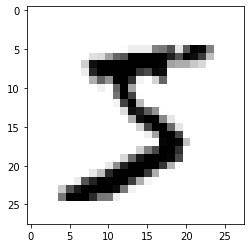

In [4]:
#Visulaizing

import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [5]:
print(y_train[0])

5


So the image after visualizing is observed to be 5 and y_train = 5

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

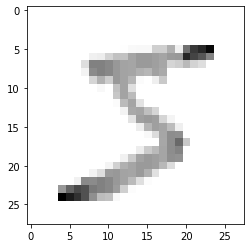

In [7]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2610 - accuracy: 0.9241
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1049 - accuracy: 0.9678
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0728 - accuracy: 0.9769


In [10]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print("validation loss = ",val_loss)
print("Validation accuracy =",val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9700
validation loss =  0.09374703466892242
Validation accuracy = 0.9700000286102295


In [11]:
model.save('epic_num_reader.model')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [12]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [13]:
predictions = new_model.predict(x_test)
print(predictions)

[[4.0344932e-09 2.8339059e-07 6.8255693e-05 ... 9.9992478e-01
  1.2110269e-07 2.1384988e-06]
 [7.9917917e-10 3.4496209e-04 9.9961227e-01 ... 1.9255681e-08
  6.9445416e-10 2.0012087e-12]
 [9.0824400e-08 9.9944931e-01 1.8994586e-05 ... 1.1074670e-05
  4.5504610e-04 1.4668047e-06]
 ...
 [4.7315378e-09 3.2385483e-06 8.7609251e-08 ... 2.5013907e-05
  8.5895859e-05 1.5709916e-04]
 [1.2361045e-08 1.4632867e-08 5.9241248e-08 ... 5.8133327e-08
  6.8956710e-05 1.1567401e-09]
 [1.4165184e-05 5.7647048e-07 5.4332581e-06 ... 1.7459434e-09
  3.8830837e-07 4.6417728e-07]]


In [14]:
import numpy as np

print(np.argmax(predictions[0]))

7


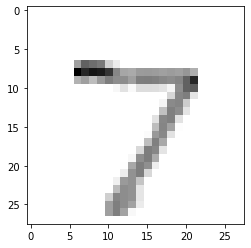

In [15]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [16]:
print(np.argmax(predictions[9]))

9


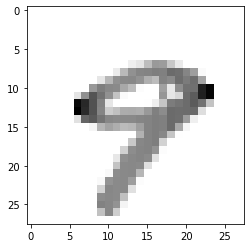

In [17]:
plt.imshow(x_test[9],cmap=plt.cm.binary)
plt.show()